In [162]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
%matplotlib inline

In [237]:
class KMeans:
    def __init__(self, k: int=3):
        self.k = k
        
    def fit(self, X: ndarray, return_clusters: bool = False):
        n_samples, n_features = X.shape
        
        # initialize the cluster centroids randomly
        self.centroids: ndarray = X[np.random.choice(n_samples, size=self.k)]
        
        if return_clusters:
            self.history = []
        
        while True:
            # assign all the points to its nearest centroid
            distances: ndarray = np.zeros((n_samples, self.k))
            
            for i in range(self.k):
                distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
            
            # cluster labels of the each row in the data
            self.labels: ndarray = np.argmin(distances, axis=1)
            
            if return_clusters:
                self.history.append((self.labels, self.centroids))
            
            # update the centroids
            new_centroids: ndarray = np.empty((self.k, n_features))
            for i in range(self.k):
                new_centroids[i] = np.mean(X[self.labels == i], axis=0)
            
            # check if the centroids are not improving then stop
            if np.allclose(self.centroids, new_centroids):
                break
             
            self.centroids = new_centroids

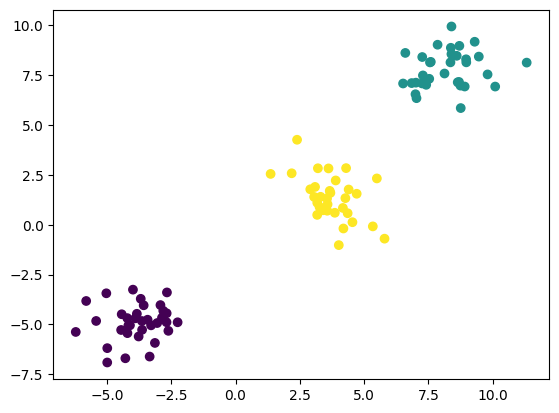

In [245]:
X, labels = make_blobs(n_samples=100, n_features=2, centers=3, random_state=49)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

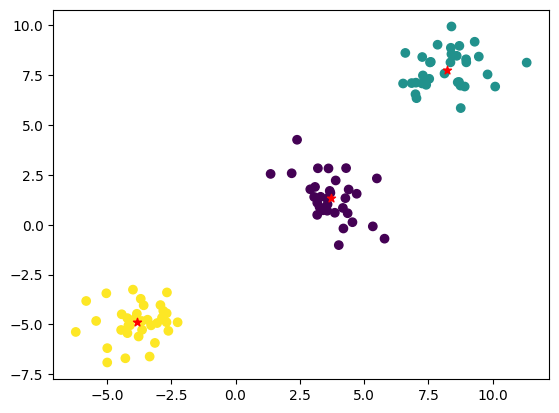

In [253]:
kmeans = KMeans(k=3)
kmeans.fit(X, return_clusters=True)
labels = kmeans.labels
centroids = kmeans.centroids
history = kmeans.history


# plot the final result
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="*")

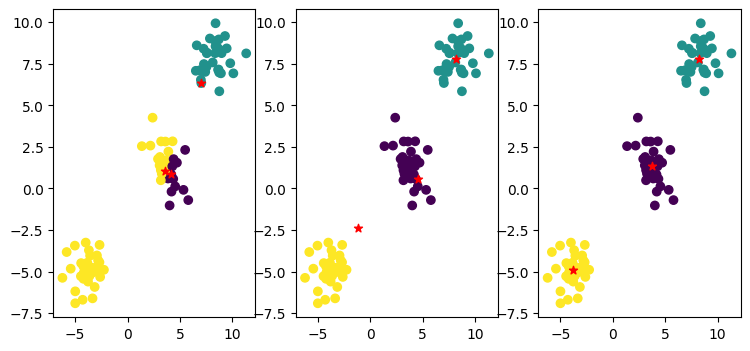

In [254]:
# plot the process
plt.figure(figsize=(12, 4))
for i, h in enumerate(history):
    plt.subplot(len(history) // 4 + 1, 4, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=h[0])
    plt.scatter(h[1][:, 0], h[1][:, 1], c="red", marker="*")